# The Shopping Habits of Instacart Customers
    
**Introduction**
    
    Instacart, the grocery delivery platform, has collected data on its products and sales over time. Instacart wants that data to be used to provide insight into the products and customers. 
    
    The goal of the project is to preprocess and then analyze the data. Missing and duplicate values will need to be identified and fixed, either by removal or filling in. The analysis will include how many orders are placed during each hour of the day, what days of the week people shop for grocieries, how long people wait until their next order, a comparision between distributions of order time on Wednesdays and Saturdas, the top 20 products ordered most frequently, the number of items people purchase in one order, and the top 20 items that are reordered most often. This will be done using plotting of various graphs and charts.
    
    Instacart provided a data set consisting of information on order times and days, products, departments, days since prior order, and more. The data set is split into five distinct files; orders, products, order products, aisles, and departments. 
        

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
orders = pd.read_csv('instacart_orders.csv', sep = ';')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [7]:
products = pd.read_csv('products.csv', sep = ';')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
order_products = pd.read_csv('order_products.csv', sep = ';')
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [11]:
aisles = pd.read_csv('aisles.csv', sep = ';')
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [13]:
departments = pd.read_csv('departments.csv', sep = ';')
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In the 5 data sets read above, there are some missing rows. We can see that the type of data present are int64, object, and float.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [19]:
# Check for duplicated orders
orders.duplicated().sum()

15

In [21]:
# Check for all orders placed Wednesday at 2:00 AM
# this assumes that day 0 is Sunday and Wednesday is day 3
orders.loc[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [23]:
# Remove duplicate orders
orders.drop_duplicates(inplace=True)

In [25]:
# Double check for duplicate rows
orders.duplicated().sum()

0

In [27]:
# Double check for duplicate order IDs only
orders['order_id'].duplicated().sum()

0

Here I found 15 duplicate rows in the orders dataframe, dropped them and then checked my work.

### `products` data frame

In [29]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [31]:
# Check for just duplicate product IDs
products['product_id'].duplicated().sum()

0

In [33]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower() # converting names to lowercase
products['product_name'].duplicated().sum() # checking for duplicate product names

1361

In [35]:
# Check for duplicate product names that aren't missing
products[(products['product_name'].duplicated()) & ~(products['product_name'].isna())]

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In this dataframe i didn't find any duplicate rows, however I found that there were 1361 duplicate product names and 104 product name duplicates that weren't missing.

### `departments` data frame

In [39]:
# checking for duplicate rows in the departments df
departments.duplicated().sum()

0

The departments data frame had no duplicate rows

### `aisles` data frame

In [43]:
# checking for duplicate rows in the aisles df
aisles.duplicated().sum()

0

In [45]:
aisles['aisle'].duplicated().sum()

0

The aisles data frame had no duplicate rows.

### `order_products` data frame

In [49]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [50]:
# Double check for any other tricky duplicates
# checking for duplicate order ids in the order products df
order_products[['order_id', 'product_id']].duplicated().sum()

0

## Find and remove missing values


### `products` data frame

In [55]:
#counting the missing values in each column of the products df
products.isnull().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [57]:
# Are all of the missing product names associated with aisle ID 100?
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


Yes, there are no missing product names not associated with aisle ID 100

In [60]:
# Are all of the missing product names associated with department ID 21?
products[(products['product_name'].isna()) & (products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


Yes, there are no missing product names not associated with department ID 21

In [63]:
# What is this ailse and department?


The aisle and department are both missing.

In [66]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna(value='unknown')

In section 2.1, I found missing values in the products data frame and replaced them with 'unknown.'

### `orders` data frame

In [72]:
#counting the missing values in each column of the orders df
orders.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [74]:
# Are there any missing values where it's not a customer's first order?
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


All of the missing values are when its a customer's first order

The orders data frame had 28,817 missing values in the days since prior order column. Those were only missing when it was customer's first order. 

### `order_products` data frame

In [79]:
order_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [81]:
# What are the min and max values in this column?
display(order_products['add_to_cart_order'].min())
order_products['add_to_cart_order'].max()

1.0

64.0

In [83]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_order_ids = order_products[(order_products['add_to_cart_order'].isna())]['order_id'].tolist()


In [85]:
# Added by the reviewer
# Here we selected all rows that are attributed to the orders with missing values, not only those rows in which there are missing values

missing_orders_all_data = order_products[order_products['order_id'].isin(missing_order_ids)]

In [87]:
# Do all orders with missing values have more than 64 products?
missing_orders_all_data.groupby('order_id').size().min()

65

Yes, all orders with missing values have at least 65 products. 

In [90]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(value='999')
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')

In the order products data frame, I replaced all missing values with 999. Any missing values were found in the add to cart order column, which was converted into an integer data type.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [93]:
display(orders['order_hour_of_day'].unique().min())
orders['order_hour_of_day'].unique().max()

0

23

In [95]:
display(orders['order_dow'].unique().min())
orders['order_dow'].unique().max()

0

6

The min and max order_dow was verified as between 0 and 6, or Sunday to Saturday. The order hour of day ranged from 0 to 23, or 12am to 11pm.

### [A2] What time of day do people shop for groceries?

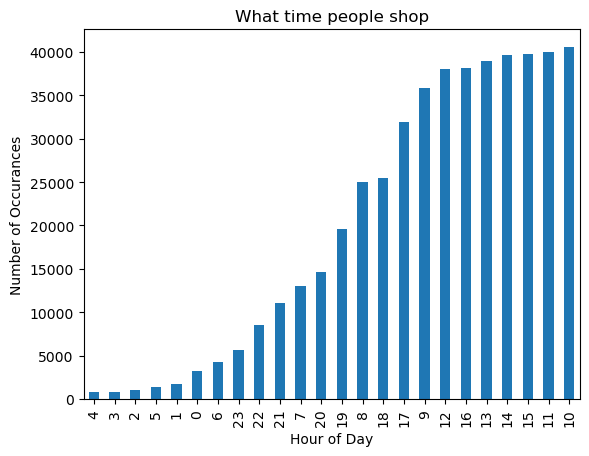

In [99]:
orders['order_hour_of_day'].value_counts().sort_values().plot(kind='bar', x='order_hour_of_day', title = 'What time people shop')
plt.ylabel('Number of Occurances')
plt.xlabel('Hour of Day')
plt.show()

The majority of shopping is done at 10 and 11, followed by 15 and 14. The mean of the column is 1:44pm. 

### [A3] What day of the week do people shop for groceries?

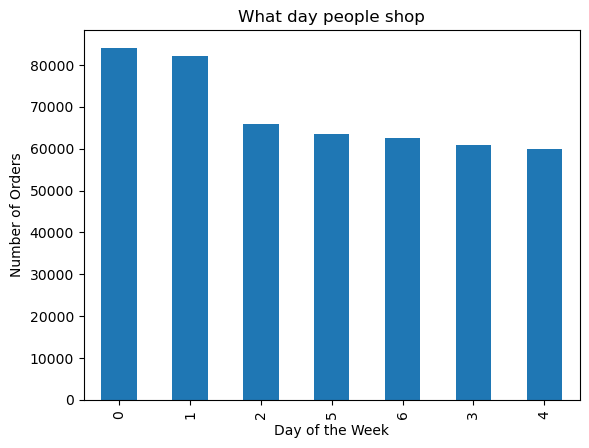

In [111]:
orders['order_dow'].value_counts().plot(kind='bar', x='order_dow', title = 'What day people shop')
plt.ylabel('Number of Orders')
plt.xlabel('Day of the Week')
plt.show()

Tuesday evening, assuming day 0 is Sunday, is the mean. That being said, the majority of shopping for groceries was done on Mondays and Tuesdays.

### [A4] How long do people wait until placing another order?

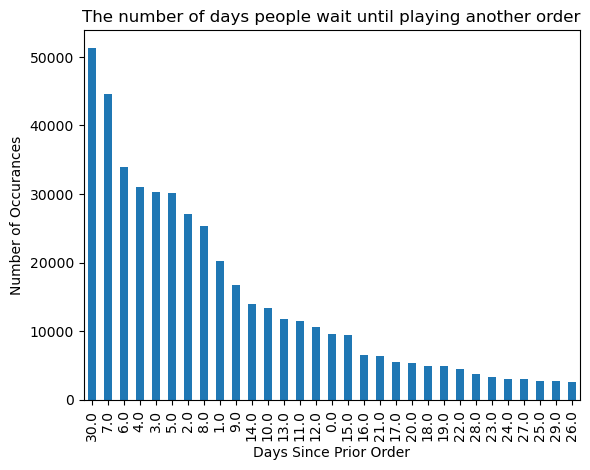

In [113]:
orders['days_since_prior_order'].value_counts().plot(kind='bar')
plt.ylabel('Number of Occurances')
plt.xlabel('Days Since Prior Order')
plt.title('The number of days people wait until playing another order')
plt.show()

People wait either 30 days or 7 days for the most part until placing another order

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

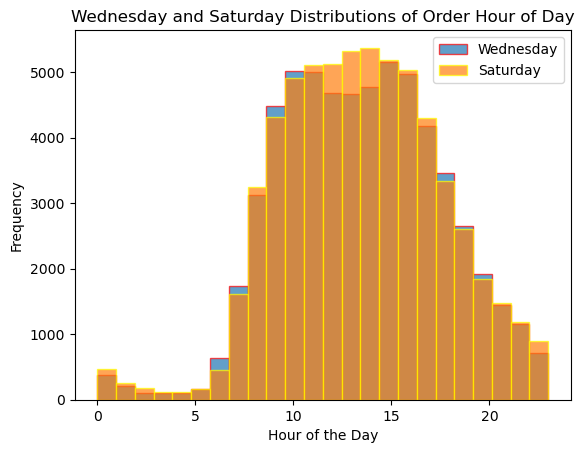

In [118]:
plt.hist(orders[orders['order_dow'] == 3]['order_hour_of_day'], bins=24, alpha=.7, label='Wednesday', edgecolor='red')
plt.hist(orders[orders['order_dow'] == 6]['order_hour_of_day'], bins=24, alpha=.7, label='Saturday', edgecolor='yellow')
plt.ylabel('Frequency')
plt.legend()
plt.xlabel('Hour of the Day')
plt.title('Wednesday and Saturday Distributions of Order Hour of Day')
plt.show()

The order hour of day distributions are very similar on Wednesdays and Saturdays. The only visible difference is between 10am and 3pm. It is slightly less on Wednesday.

### [B2] What's the distribution for the number of orders per customer?

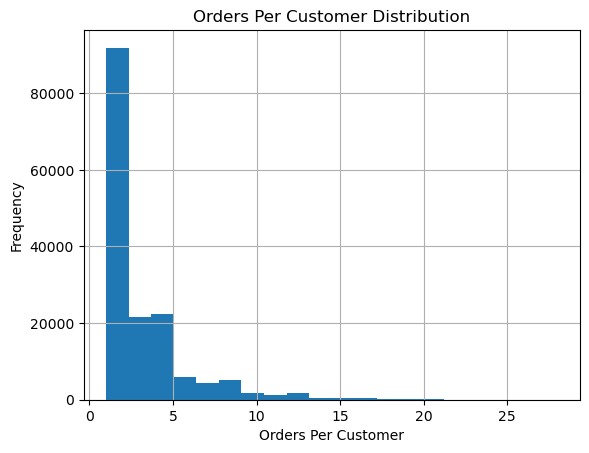

In [122]:
orders.groupby('user_id')['order_id'].count().hist(bins = 20)
plt.ylabel('Frequency')
plt.xlabel('Orders Per Customer')
plt.title('Orders Per Customer Distribution')
plt.show()

The number of orders per customer has a distribution that is skewed left. The overwhelming majority of customers order once to twice, with a smaller portion ordering 3-5 times. 

### [B3] What are the top 20 popular products (display their id and name)?

In [126]:
merged = order_products.merge(products, on = 'product_id')

In [128]:
merged

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,chicken breast tenders breaded,129,1
1,147172,11440,7,1,chicken breast tenders breaded,129,1
2,3341719,11440,4,1,chicken breast tenders breaded,129,1
3,1938779,11440,8,1,chicken breast tenders breaded,129,1
4,1728338,11440,23,0,chicken breast tenders breaded,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,sweet teriyaki chicken oven sauce,5,13
4545003,2621676,25201,10,0,crisp waters candle scents,101,17
4545004,937623,49153,2,0,shine collection brillance shampoo,22,11
4545005,532895,8182,1,0,total mint stripe gel toothpaste,20,11


In [130]:
merged.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False).head(20)

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
Name: order_id, dtype: int64

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [134]:
order_products.groupby('order_id')['product_id'].count().mean()

10.098983215049127

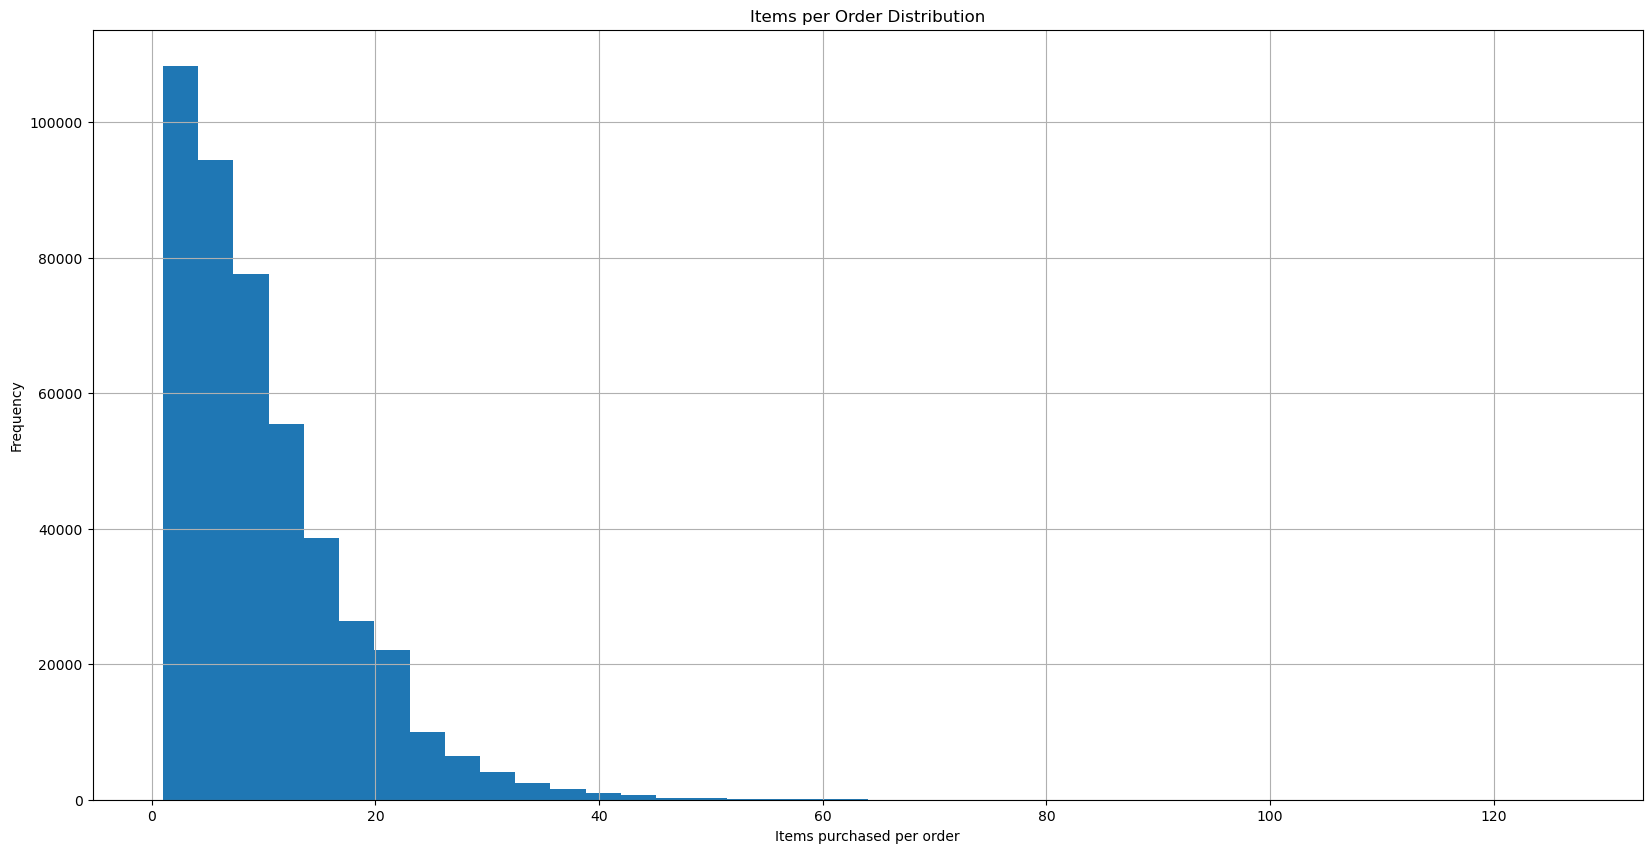

In [136]:
order_products.groupby('order_id')['product_id'].count().hist(bins = 40, figsize=(20,10))
plt.ylabel('Frequency')
plt.xlabel('Items purchased per order')
plt.title('Items per Order Distribution')
plt.show()

The distribution here is skewed to the left. With the mean order size at 10 items, most orders contain about 10 items, with the majority of orders containing less.  

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [140]:
merged_2 = merged[merged['reordered'] == 1]
merged_2

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1,147172,11440,7,1,chicken breast tenders breaded,129,1
2,3341719,11440,4,1,chicken breast tenders breaded,129,1
3,1938779,11440,8,1,chicken breast tenders breaded,129,1
7,331884,11440,5,1,chicken breast tenders breaded,129,1
8,1869056,11440,12,1,chicken breast tenders breaded,129,1
...,...,...,...,...,...,...,...
4544981,2421451,10661,2,1,plastic party cups,111,17
4544983,1215763,14192,7,1,golden echinacea liquid herbal extract,11,11
4544993,1817765,16672,11,1,caramel galette french cookies,61,19
4544994,1993036,22264,3,1,100% white grape juice concentrate,113,1


In [142]:
merged_2.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False).head(20)

product_id  product_name            
24852       banana                      55763
13176       bag of organic bananas      44450
21137       organic strawberries        28639
21903       organic baby spinach        26233
47209       organic hass avocado        23629
47766       organic avocado             18743
27845       organic whole milk          16251
47626       large lemon                 15044
27966       organic raspberries         14748
16797       strawberries                13945
26209       limes                       13327
22935       organic yellow onion        11145
24964       organic garlic              10411
45007       organic zucchini            10076
49683       cucumber kirby               9538
28204       organic fuji apple           8989
8277        apple honeycrisp organic     8836
39275       organic blueberries          8799
5876        organic lemon                8412
49235       organic half & half          8389
Name: order_id, dtype: int64

The top items that are reordered most frequently are above.

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

<b>Conclusion</b>
    
Overall, I was able to identify the top 20 most popular reordered items, the top 20 most frequently purchased items, the number of itmes (10) that are most often purchased in an order, the distributions of the number of items per customer as well as the distributions of hour of day of order on Wednesdays and Saturdays. Most people wait either one month or one week until placing another order. Most grocery shopping is performed on Mondays and Tuesdays. 